# Multiple linear regression

La regresión lineal debe cumplir los supuestos de linealidad, homocedasticidad. normalidad e independencia

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

# import the Counter class from the collections module, which will be used for counting the occurrence of elements in a dataset, facilitating frequency analysis.
from collections import Counter

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')

#### (Multiple) linear regression on the enrollment data

In [9]:
address = '../data/enrollment_forecast.csv'

enroll = pd.read_csv(address)
enroll.columns = ['year','roll','unem','hgrad','inc']
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


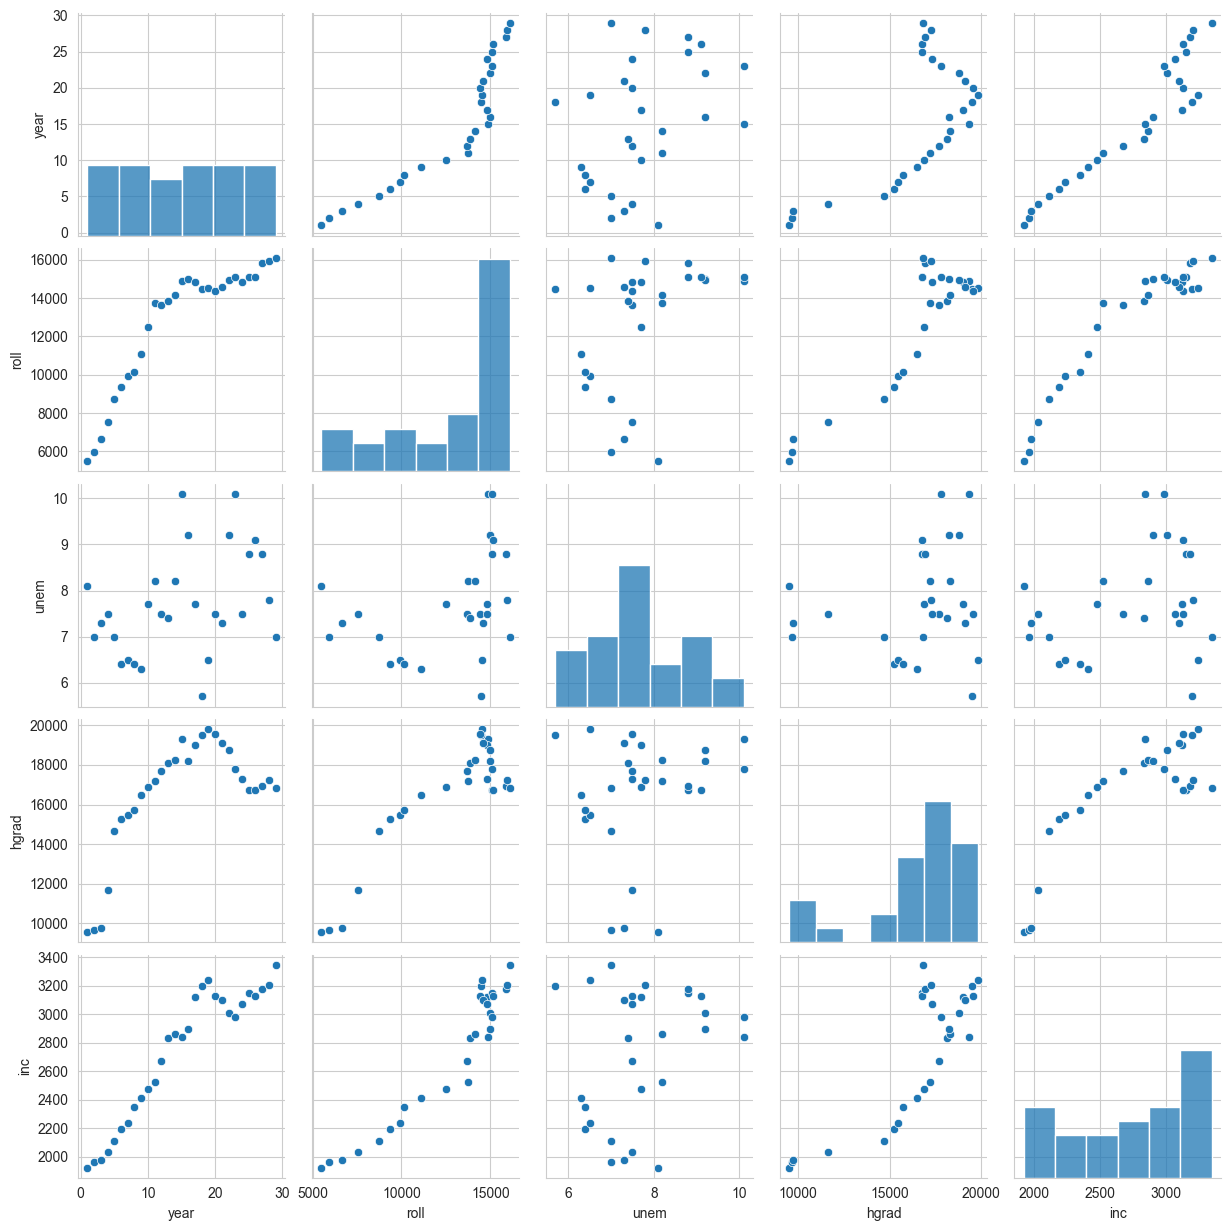

In [10]:
sns.pairplot(enroll)

Es myu importante verificar que las variables explicativas no estén correlacionadas entre ellas (supuesto de variables independientes) pero si debería haber variables independientes correlacionadas con la dependiente. Por ejemplo ['unem','hgrad'] no están muy correlacionadas (0.18) pero unem y roll tiene 0.39 y hgrad y roll 0.89. El unem es bajo pero para fines de este ejemplo sirve

In [11]:
print(enroll.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


Es super importante escalar o transformar los datos exógenos por temas de supestos, donde se debe tener una distribución normal con media 0 y std = 1

In [12]:
enroll_data = enroll[['unem','hgrad']].values

enroll_target = enroll['roll'].values

enroll_data_names = ['unem','hgrad']


X,y = scale(enroll_data), enroll_target

In [27]:
scale(enroll_data)[:,0].std()

np.float64(0.9999999999999999)

In [29]:
missing_values = X==np.nan
X[missing_values == True]

array([], dtype=float64)

In [31]:
LinReg = LinearRegression()
LinReg.fit(X,y)
print(LinReg.score(X,y))

0.8488812666133723


# Ejemplo propio

Teniendo las bases anteriores, tomé un dataset de Kaggle con precios de laptops

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

### Cargue de datos

df= pd.read_csv('../data/laptop_price - dataset.csv')

Vemos que tiene 15 columnas que pueden ser tratados de diferente manera. En general la mayoría de variables son categóricas. La variable de interés va a ser el precio.
Primero y muy importante antes de cualquier cosa es ver los datos cómo son, valores nulos, duplicados, etc. 

En este dataset no parece haber nan

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

In [6]:
df.isnull().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

In [226]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [3]:
import sklearn
# import the logistic regression model, as well as the metrics module from Scikit Learn - that's useful for scoring our predictive models.
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [4]:
binary_encoder = OneHotEncoder(categories='auto', drop = 'first')
Company_1hot = binary_encoder.fit_transform(df[["Company","TypeName","CPU_Company","GPU_Company","OpSys"]]).todense()
column_name = binary_encoder.get_feature_names_out(["Company","TypeName","CPU_Company","GPU_Company","OpSys"])
Company_df = pd.DataFrame(Company_1hot, columns=column_name)

In [5]:
#g=sns.boxplot(x='Memory', y='Price (Euro)', data=df)
#g.set_xticklabels(g.get_xticklabels(), rotation=450)

new_df=pd.concat([df[["Inches","CPU_Frequency (GHz)","RAM (GB)","Weight (kg)"]].apply(scale),Company_df],axis=1,verify_integrity=True)

In [8]:
from sklearn.metrics import mean_squared_error,r2_score
LinReg = LinearRegression()
LinReg.fit(new_df,df['Price (Euro)'])
print(LinReg.score(new_df,df['Price (Euro)']))
y_pred = LinReg.predict(new_df)
MSE = mean_squared_error(df['Price (Euro)'],y_pred)
r2 = r2_score(df['Price (Euro)'], y_pred)
MSE,r2

0.7431640657422411


(np.float64(126021.41347382433), 0.7431640657422411)

## Probar supuestos (homocedasticidad y errores distribuidos normales 

Me dió un R2 alto, sin embargo, si aplico la forma de train - test, el resultado es pésimo. Replicando un ejercicio similar en internet, parece ser que el exceso de dummies arruina el modelo. Es mejor, como se sugiere en varios cursos, aplicar la regresión especialmente en casos donde hayan principalmente variables cuantitativas. En general, debo tener cuidado con el uso de estas. Igual el R2 me da una pista.

In [341]:
new_df=pd.concat([df[["Inches","CPU_Frequency (GHz)","RAM (GB)","Weight (kg)"]],df['Price (Euro)'],Company_df],axis=1,verify_integrity=True)

In [342]:
new_df

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro),Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,GPU_Company_Intel,GPU_Company_Nvidia,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,13.3,2.3,8,1.37,1339.69,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,13.3,1.8,8,1.34,898.94,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,15.6,2.5,8,1.86,575.00,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,15.4,2.7,16,1.83,2537.45,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,13.3,3.1,8,1.37,1803.60,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,14.0,2.5,4,1.80,638.00,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1271,13.3,2.5,16,1.30,1499.00,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1272,14.0,1.6,2,1.50,229.00,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1273,15.6,2.5,6,2.19,764.00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [343]:
X_train, X_test, y_train, y_test = train_test_split(new_df.drop('Price (Euro)', axis=1), scale(new_df['Price (Euro)']), test_size=0.20)

In [344]:
y_train

array([ 0.73525678,  0.73382919, -0.67949215, ...,  2.14715052,
        0.57108309, -1.09349537])

In [345]:
LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
y_pred = LinReg.predict(X_test)
#print(classification_report(y_test,y_pred))

In [7]:

MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
MSE,r2

NameError: name 'y_test' is not defined

# Copiado de Kaggle

In [323]:
df.select_dtypes(exclude = 'object').columns


Index(['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Weight (kg)',
       'Price (Euro)'],
      dtype='object')

In [327]:


def data_preprocess(data , x):
    temp = pd.get_dummies(data[x],drop_first = True).astype(int)
    data = pd.concat([data,temp],axis =1)
    data = data.drop(columns =x)
    return data
    
df = data_preprocess(df,'Company')
df =data_preprocess(df,'TypeName')
df = data_preprocess(df,'CPU_Company')
df = data_preprocess(df,'GPU_Company')
df = data_preprocess(df,'OpSys')



In [329]:


x = df.drop(columns= 'Price (Euro)')
y = df['Price (Euro)']



In [331]:


from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for cols in x.select_dtypes('object').columns:
    x[cols]=label.fit_transform(x[cols])



In [332]:
Numerical_columns = df.select_dtypes(exclude = 'object').columns
Categorical_columns = df.select_dtypes(include = 'object').columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[Numerical_columns] = scaler.fit_transform(df[Numerical_columns])



In [334]:


from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size =0.2)



In [335]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model = LinearRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)

MSE = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
MSE,r2

(np.float64(125387.42435559939), 0.7172870671756012)

In [305]:
x

,Product,Inches,ScreenResolution,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Type,Weight (kg),Apple,...,Intel,Nvidia,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,300,13.3,23,40,2.3,8,4,56,1.37,1,...,1,0,0,0,0,0,0,0,0,1
1,301,13.3,1,40,1.8,8,2,50,1.34,1,...,1,0,0,0,0,0,0,0,0,1
2,50,15.6,8,46,2.5,8,16,52,1.86,0,...,1,0,0,0,0,1,0,0,0,0
3,300,15.4,25,54,2.7,16,29,76,1.83,1,...,0,0,0,0,0,0,0,0,0,1
4,300,13.3,23,40,3.1,8,16,57,1.37,1,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,580,14.0,13,55,2.5,4,4,46,1.80,0,...,1,0,0,0,0,0,1,0,0,0
1271,588,13.3,19,55,2.5,16,29,46,1.30,0,...,1,0,0,0,0,0,1,0,0,0
1272,196,14.0,0,20,1.6,2,35,39,1.50,0,...,1,0,0,0,0,0,1,0,0,0
1273,2,15.6,0,55,2.5,6,10,88,2.19,0,...,0,0,0,0,0,0,1,0,0,0
